In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('total-sunshine-duration-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,solar_radiation,mean_relative_humidity,mean_air_temperature,mean_wind_speed,total_precipitation,percentage_possible_sunshine,total_sunshine_duration
0,Jan-10,9.1,67,16.8,5.0,90.0,28,92.7
1,Feb-10,9.2,77,18.3,5.6,276.5,22,69.5
2,Mar-10,14.2,71,19.9,5.8,41.5,36,134.9
3,Apr-10,13.4,76,21.2,5.4,219.0,21,81.3
4,May-10,14.8,79,23.8,5.1,574.5,27,111.8


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.9896546144278102


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[ 87.49416066  68.82629728 133.89688491  85.85873385 108.78340465
 134.59410829 147.35449886 182.71358097 212.464684   122.3125591
 107.20649963 121.45758567  48.97205864 111.99974436  90.16140098
 184.51095295  74.51633067 191.38864766 226.65054727 193.68634537
 216.11790748 113.04563367  78.15519327  60.48569141  42.46040322
  54.72460388 125.920336   102.75897512 139.65993884 125.43293263
 228.95739779 162.0409449  164.19073106 166.67949423 118.95356966
  90.59177948  90.87886567 121.02089458 141.88985767  94.6275438
  96.40662987 218.35077251 258.9376305  236.61822436 215.65898912
 131.24539622 123.34308035  82.82708895 143.44197171  88.97791
 110.01081212 154.33999732 111.38033941 135.09391069 226.92673834
 171.59524531 230.30391538 172.84631559 139.75023872  80.25931714
  84.22268166 123.90192491 125.88174355 122.72717311 144.45055815
 220.61548843 197.59543132 170.36397378 218.60394475 178.21806511
 145.63912773  97.56302579  65.45253934  87.65334319 104.431

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 4.295500616866665
Mean Squared Error: 27.269116728151
Root Mean Squared Error: 5.2219839839041065


Text(0.5, 1.0, 'Total sunshine duration - actual and predicted values')

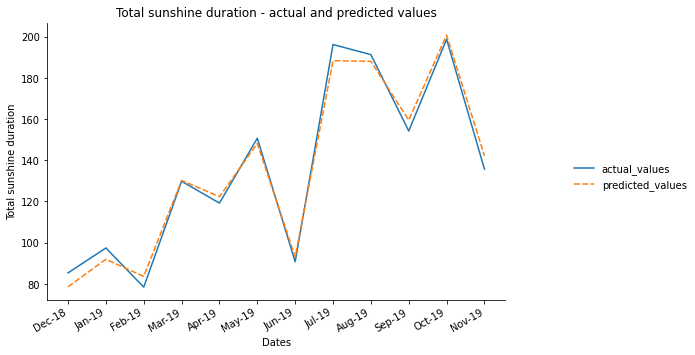

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Total sunshine duration') #set the label for the y-axis
plt.title('Total sunshine duration - actual and predicted values') #set the title of the graph